In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

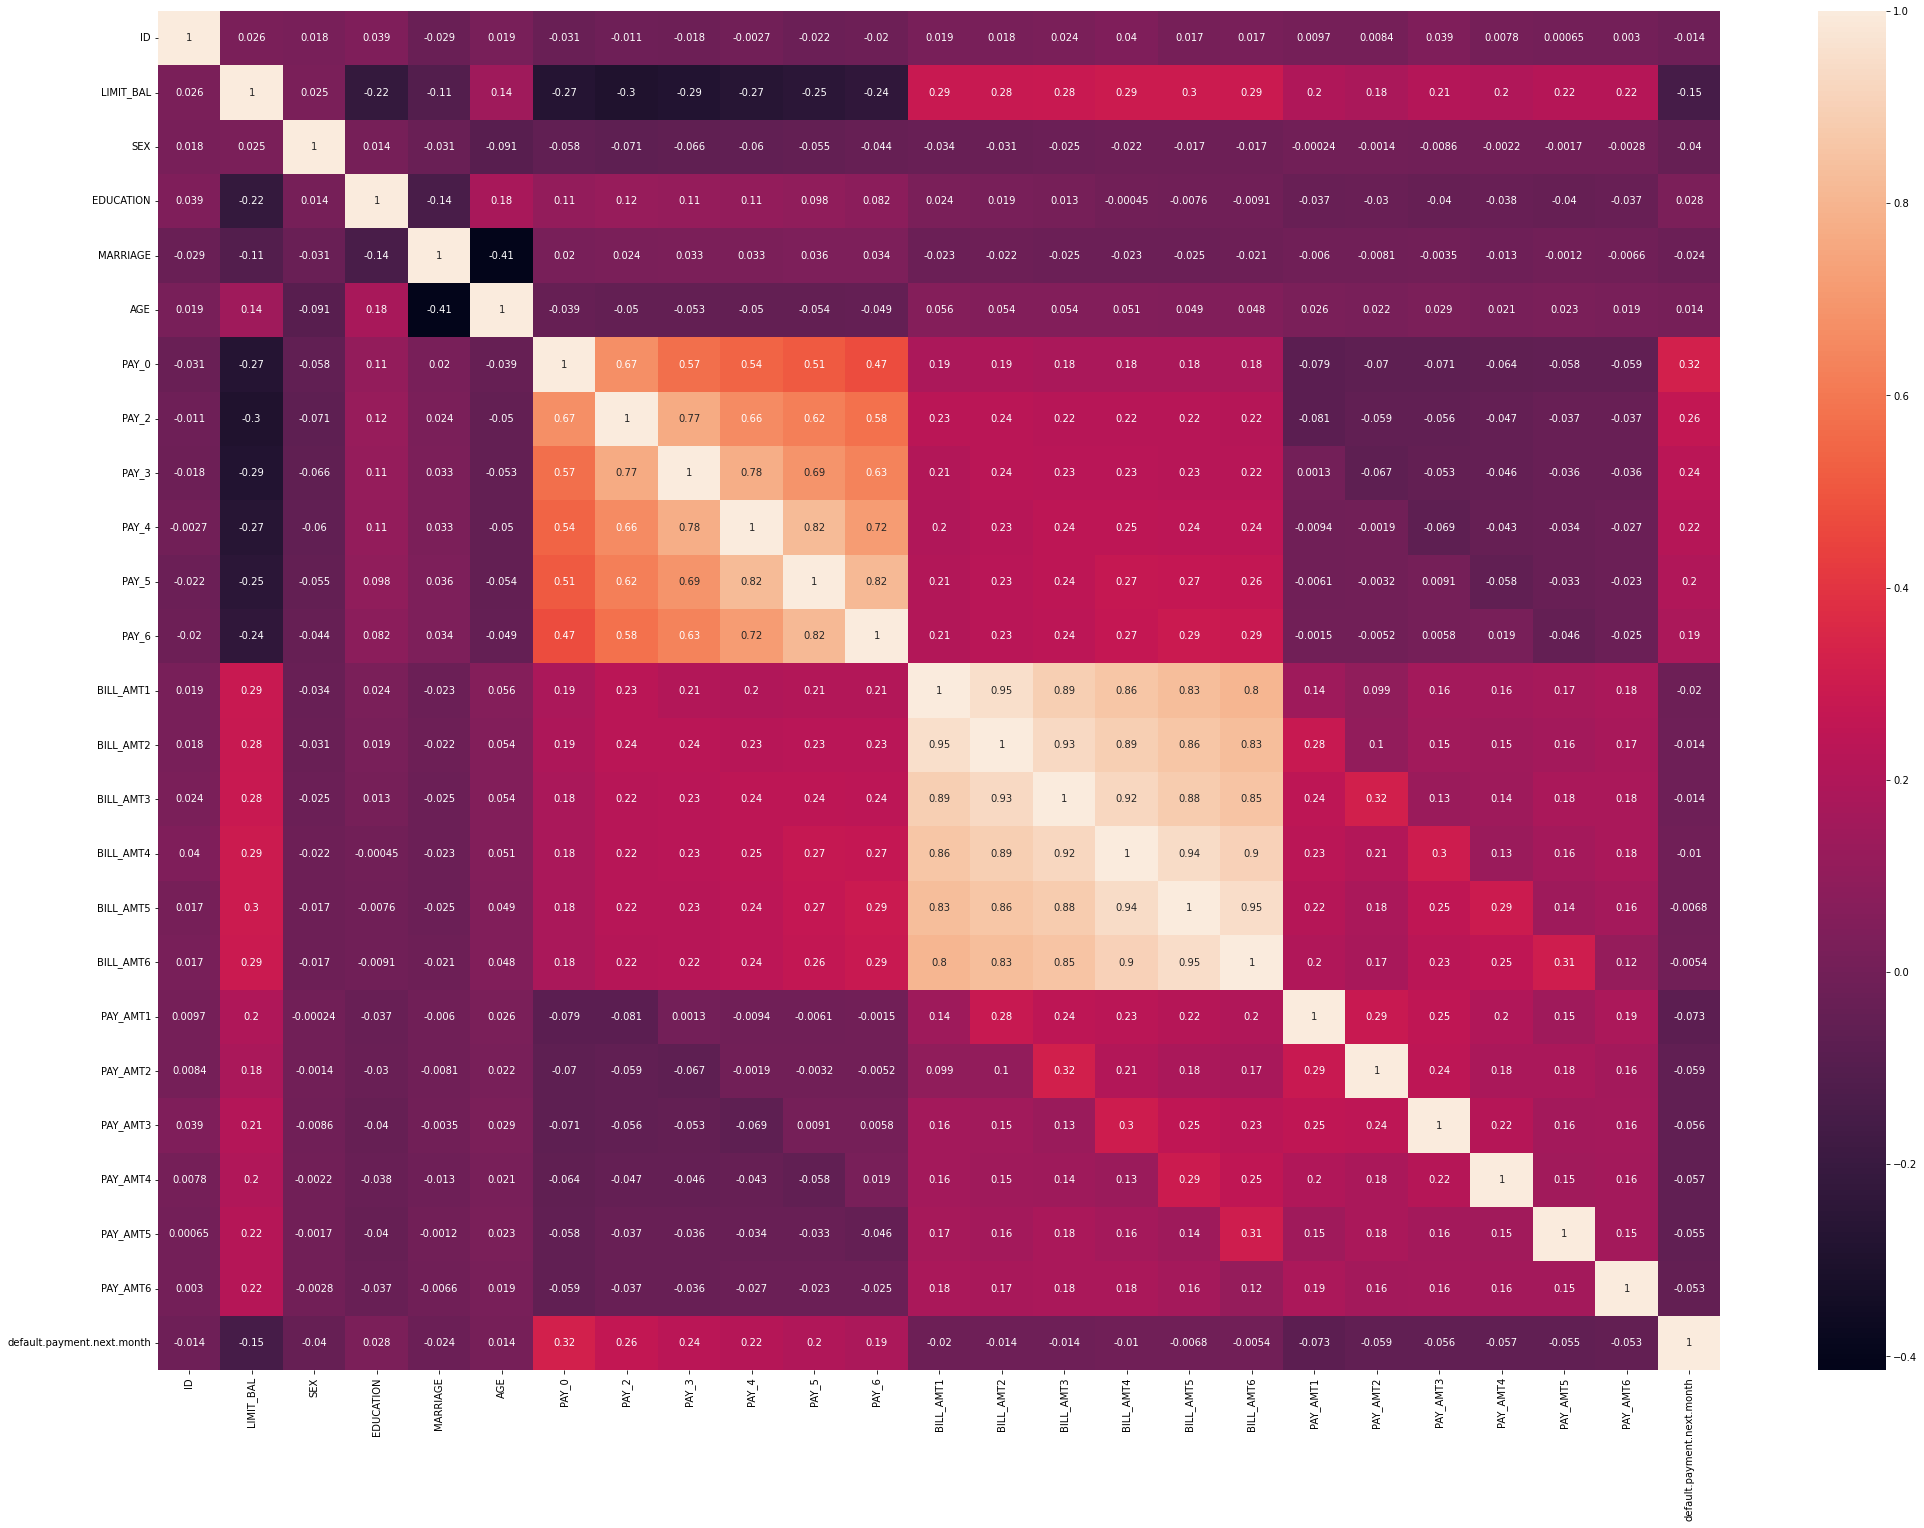

In [7]:
plt.subplots(figsize=(35,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot: >

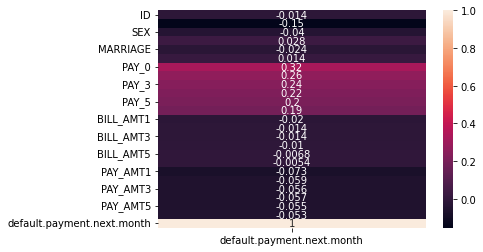

In [8]:
corr=df.corr()[["default.payment.next.month"]]
sns.heatmap(corr,annot=True)

Data Pre-Processing

EDA

Rename_default.payment.next.month

In [9]:
df.rename(columns ={"default.payment.next.month": "Default"}, inplace=True)

In [10]:
df["Default"].unique()

array([1, 0], dtype=int64)

In [11]:
df["Default"].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

Text(0.5, 1.0, 'Default Payment Next Month: 0 = no_Default, 1 = Default')

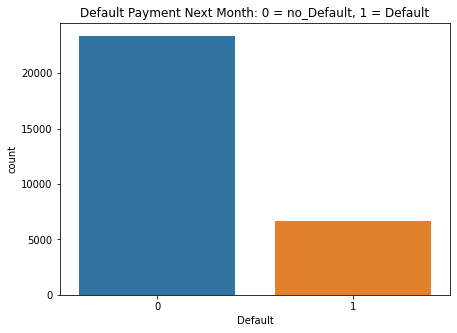

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(x="Default",order=[0,1],data=df).set_title("Default Payment Next Month: 0 = no_Default, 1 = Default")

SEX

In [13]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Sex')

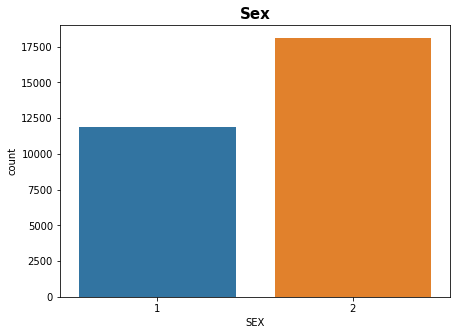

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x="SEX",order=[1,2],data=df).set_title("Sex",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Sex')

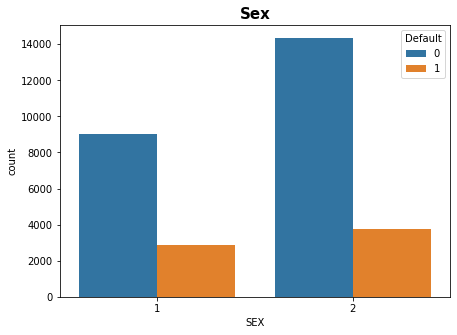

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x="SEX",order=[1,2],hue="Default",data=df).set_title("Sex",fontsize=15,fontdict={"weight": "bold"})

Marriage

In [16]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [17]:
df["MARRIAGE"].value_counts(ascending=True)

0       54
3      323
1    13659
2    15964
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Marrige')

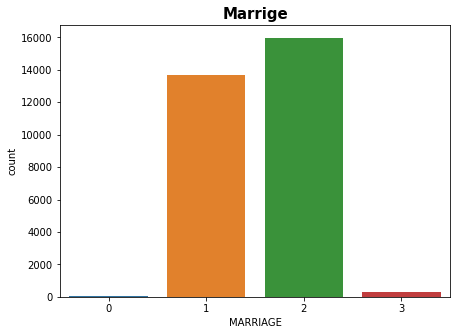

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x="MARRIAGE",order=[0,1,2,3],data=df).set_title("Marrige",fontsize=15,fontdict={"weight":"bold"})

EDUCATION

In [19]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [20]:
df["EDUCATION"].value_counts(ascending=True)

0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'EDUCATION')

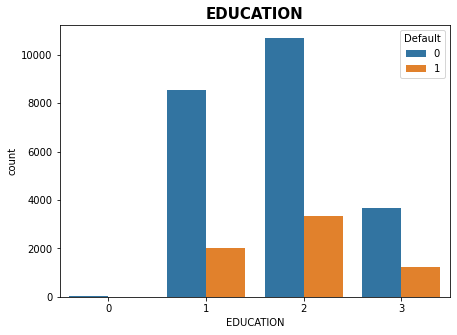

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x="EDUCATION",order=[0,1,2,3],hue="Default",data=df).set_title("EDUCATION",fontsize=15,fontdict={"weight": "bold"})

Age

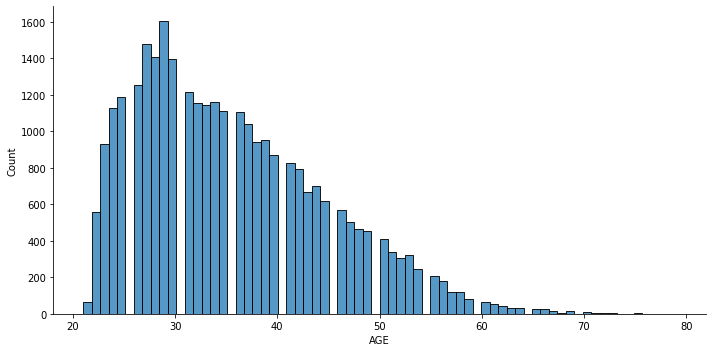

In [22]:
sns.displot(data=df, x="AGE",height=5, aspect=2)

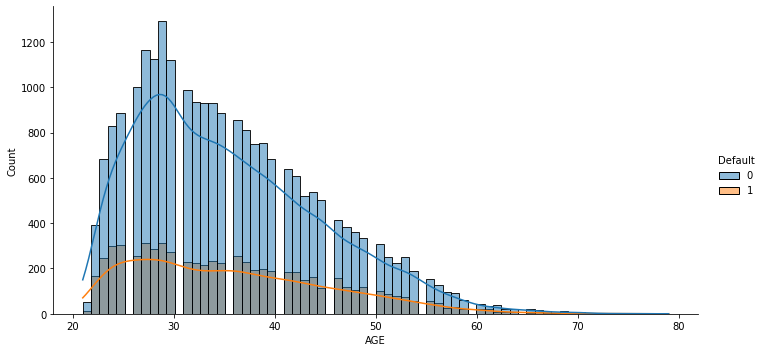

In [23]:
sns.displot(data=df, x="AGE", hue="Default", kde=True,height=5,aspect=2)

LIMIT_BAL

<AxesSubplot: xlabel='Default', ylabel='LIMIT_BAL'>

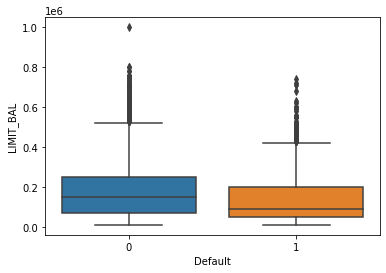

In [24]:
sns.boxplot(x="Default",y="LIMIT_BAL",data=df)

<AxesSubplot: xlabel='Default', ylabel='LIMIT_BAL'>

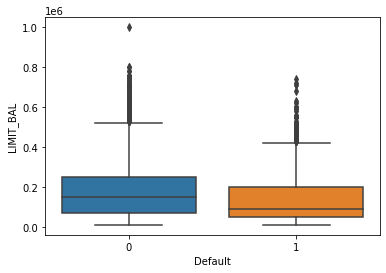

In [25]:
sns.boxplot(x="Default",y="LIMIT_BAL",data=df)

PAY_0

In [26]:
df["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [27]:
df["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

<AxesSubplot: xlabel='PAY_0', ylabel='count'>

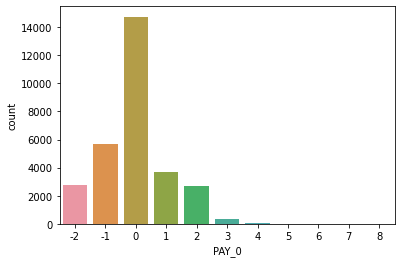

In [28]:
sns.countplot(x="PAY_0",data=df)

PAY_2

In [29]:
df["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [30]:
df["PAY_2"].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

<AxesSubplot: xlabel='PAY_2', ylabel='count'>

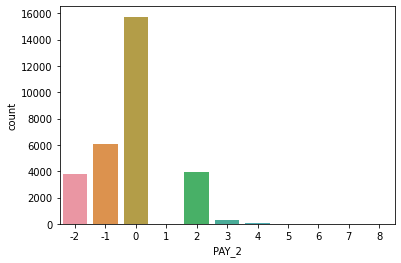

In [31]:
sns.countplot(x="PAY_2",data=df)

PAY_3

In [32]:
df["PAY_3"].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [33]:
df["PAY_3"].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

<AxesSubplot: xlabel='PAY_3', ylabel='count'>

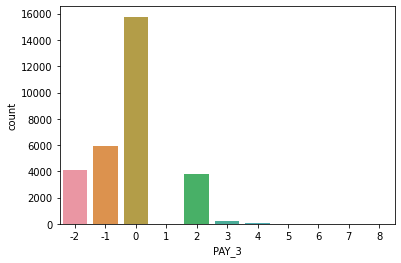

In [34]:
sns.countplot(x="PAY_3",data=df)

PAY_4

In [35]:
df["PAY_4"].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [36]:
df["PAY_4"].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

<AxesSubplot: xlabel='PAY_4', ylabel='count'>

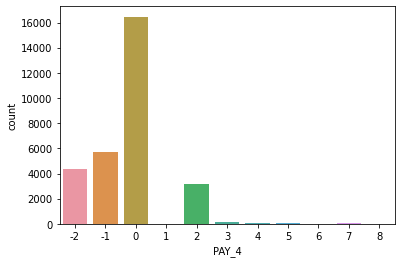

In [37]:
sns.countplot(x="PAY_4",data=df)

PAY_5

In [38]:
df["PAY_5"].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [39]:
df["PAY_5"].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

<AxesSubplot: xlabel='PAY_5', ylabel='count'>

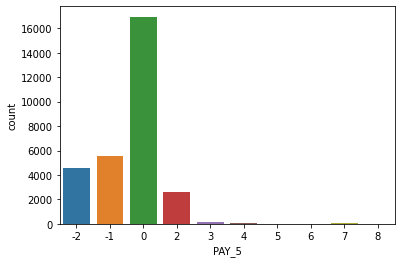

In [40]:
sns.countplot(x="PAY_5",data=df)

PAY_6

In [41]:
df["PAY_6"].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5], dtype=int64)

In [42]:
df["PAY_6"].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

<AxesSubplot: xlabel='PAY_6', ylabel='count'>

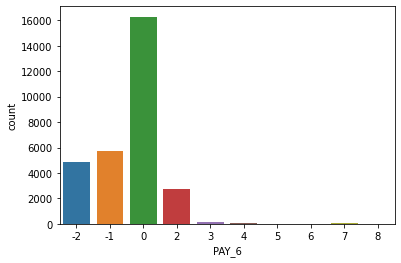

In [43]:
sns.countplot(x="PAY_6",data=df)

BILL_AMT1

<AxesSubplot: xlabel='Default', ylabel='BILL_AMT1'>

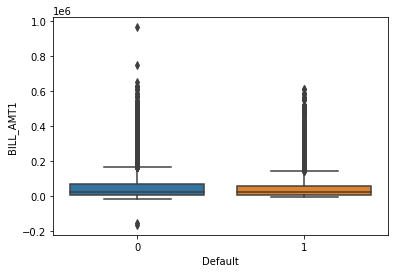

In [44]:
sns.boxplot(x="Default",y="BILL_AMT1",data=df)

BILL_AMT2

<AxesSubplot: xlabel='Default', ylabel='BILL_AMT2'>

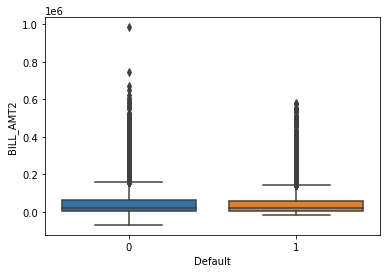

In [45]:
sns.boxplot(x="Default",y="BILL_AMT2",data=df)

BILL_AMT3

<AxesSubplot: xlabel='Default', ylabel='BILL_AMT3'>

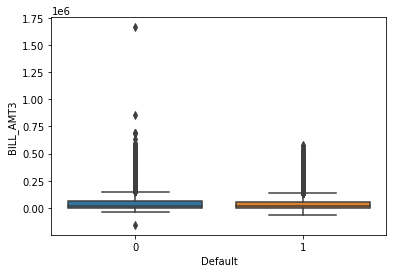

In [46]:
sns.boxplot(x="Default",y="BILL_AMT3",data=df)

BILL_AMT4

<AxesSubplot: xlabel='Default', ylabel='BILL_AMT4'>

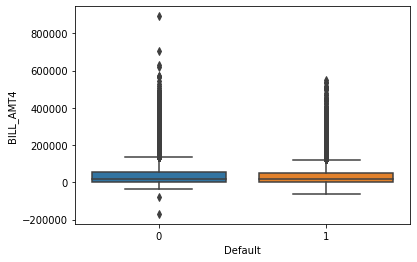

In [47]:
sns.boxplot(x="Default",y="BILL_AMT4",data=df)

BILL_AMT5

<AxesSubplot: xlabel='Default', ylabel='BILL_AMT5'>

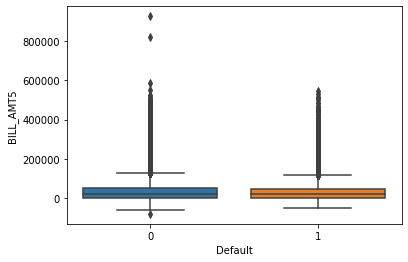

In [48]:
sns.boxplot(x="Default",y="BILL_AMT5",data=df)

BILL_AMT6

<AxesSubplot: xlabel='Default', ylabel='BILL_AMT6'>

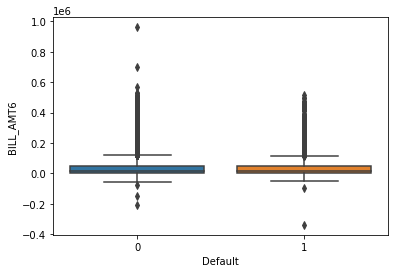

In [49]:
sns.boxplot(x="Default",y="BILL_AMT6",data=df)

PAY_AMT1

<AxesSubplot: xlabel='Default', ylabel='PAY_AMT1'>

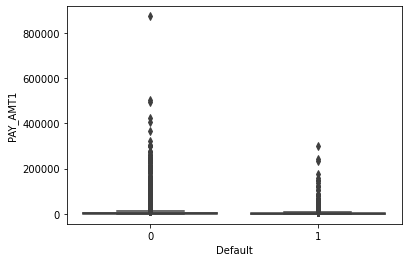

In [50]:
sns.boxplot(x="Default",y="PAY_AMT1",data=df)

PAY_AMT2

<AxesSubplot: xlabel='Default', ylabel='PAY_AMT2'>

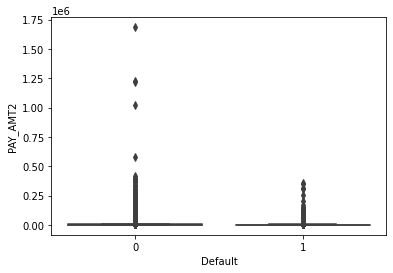

In [51]:
sns.boxplot(x="Default",y="PAY_AMT2",data=df)

PAY_AMT3

<AxesSubplot: xlabel='Default', ylabel='PAY_AMT3'>

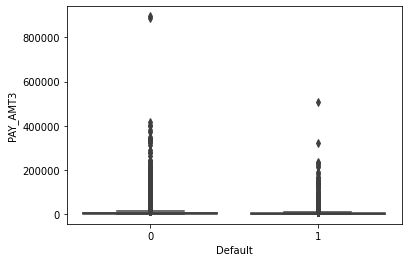

In [52]:
sns.boxplot(x="Default",y="PAY_AMT3",data=df)

PAY_AMT4

<AxesSubplot: xlabel='Default', ylabel='PAY_AMT4'>

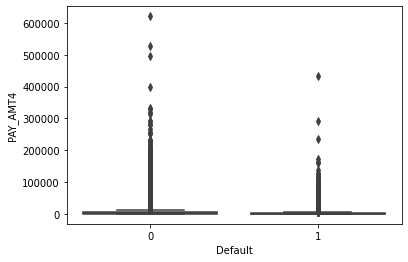

In [53]:
sns.boxplot(x="Default",y="PAY_AMT4",data=df)

PAY_AMT5

<AxesSubplot: xlabel='Default', ylabel='PAY_AMT5'>

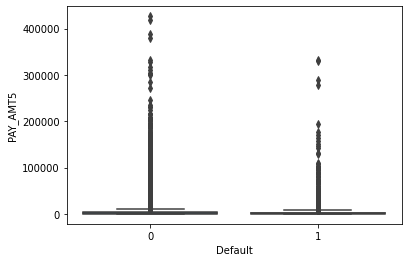

In [54]:
sns.boxplot(x="Default",y="PAY_AMT5",data=df)

PAY_AMT6

<AxesSubplot: xlabel='Default', ylabel='PAY_AMT6'>

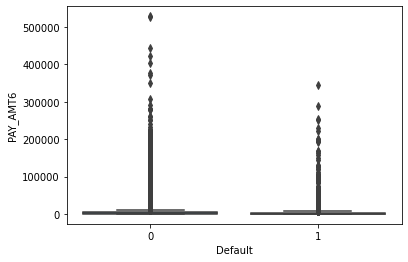

In [55]:
sns.boxplot(x="Default",y="PAY_AMT6",data=df)

Machine Learning

In [56]:
# Dividing dependent and independent variables
X = df.drop("Default", axis=1)
y = df["Default"]

In [57]:
# Sampling
# Balanacing dataset
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 23364, 0: 23364})


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

c:\Users\HP-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)


from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      4664
           1       0.60      0.63      0.61      4682

    accuracy                           0.61      9346
   macro avg       0.61      0.61      0.61      9346
weighted avg       0.61      0.61      0.61      9346



Text(33.0, 0.5, 'Actual Label')

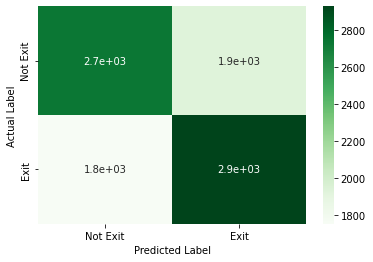

In [61]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      4664
           1       0.75      0.77      0.76      4682

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



Text(33.0, 0.5, 'Actual Label')

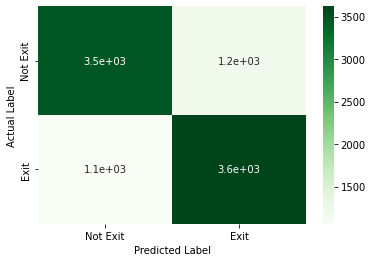

In [64]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62      4664
           1       0.63      0.81      0.71      4682

    accuracy                           0.67      9346
   macro avg       0.69      0.67      0.66      9346
weighted avg       0.68      0.67      0.66      9346



Text(33.0, 0.5, 'Actual Label')

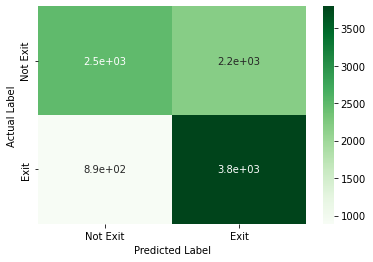

In [67]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4664
           1       0.87      0.82      0.84      4682

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



Text(33.0, 0.5, 'Actual Label')

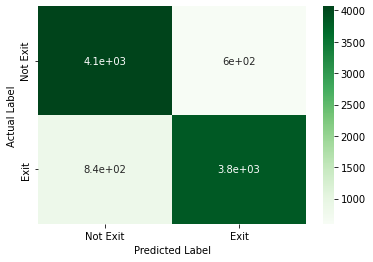

In [70]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

Support vector machine(SVM)

In [71]:
from sklearn.svm import LinearSVC as svc

svm_model = svc().fit(X_train, y_train)
y_pred=svm_model.predict(X_test)

c:\Users\HP-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.75      0.62      4664
           1       0.57      0.32      0.41      4682

    accuracy                           0.54      9346
   macro avg       0.55      0.54      0.52      9346
weighted avg       0.55      0.54      0.52      9346



XG Boost

In [73]:
from xgboost import XGBClassifier


# fit model no training data
clf = XGBClassifier(
              learning_rate=0.300000012,n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             )
xgboost_model=clf.fit(X_train, y_train)

y_pred=xgboost_model.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      4664
           1       0.85      0.79      0.82      4682

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346



Text(33.0, 0.5, 'Actual Label')

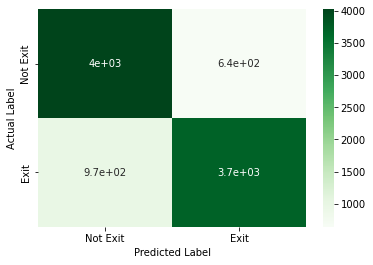

In [75]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')